In [2]:
import os
os.getcwd()
os.chdir('D:\\Professional\\UNI 23-S2\\INFO361\\Lab task 2')
import pandas as pd
mydf = pd.read_csv("admission.csv")
print(mydf)

     admit  gre   gpa  rank
0        0  380  3.61     3
1        1  660  3.67     3
2        1  800  4.00     1
3        1  640  3.19     4
4        0  520  2.93     4
..     ...  ...   ...   ...
395      0  620  4.00     2
396      0  560  3.04     3
397      0  460  2.63     2
398      0  700  3.65     2
399      0  600  3.89     3

[400 rows x 4 columns]


Best accuracy of 0.71900826446281 achieved with training size of 0.7


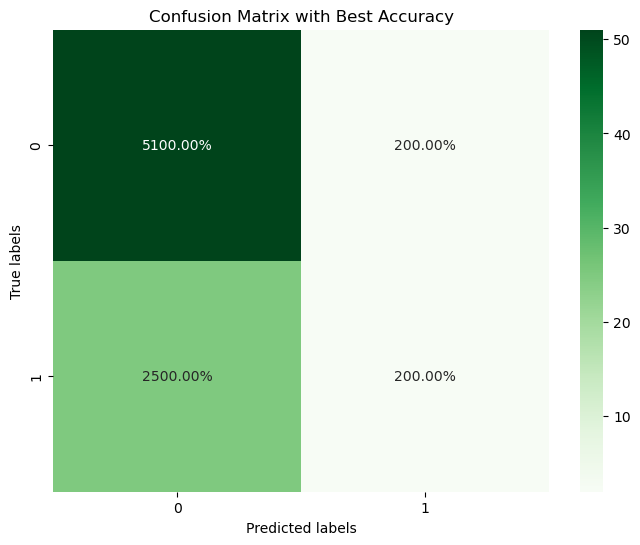

"\na. How the size of the training/testing data affects the performance of logistic regression:\n\nThe size of training/testing data plays a crucial role in the performance of logistic regression. \nHaving a larger training set can lead to a more generalized model as it has more data to learn from. \nOn the other hand, a smaller testing set might not give a true representation of the model's performance. \nHowever, if the training set is too large (and hence the testing set too small), we might overfit our \nmodel to the training data, making it perform poorly on unseen data.\n\nb. How a logistic regression model can be used in Business Analytics problems:\n\nLogistic regression is a powerful tool in business analytics due to its ability to handle classification \nproblems and predict probabilities. Some applications include:\n- Customer Churn: Predict if a customer will churn or not.\n- Credit Scoring: Predict if a borrower will default on a loan.\n- Marketing: Predict if a customer w

In [7]:
# Required Libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# a) Load the data.
# Assuming the data is in a file named 'data.csv'
data = pd.read_csv('admission.csv')






Best accuracy of 0.71900826446281 achieved with training size of 0.7


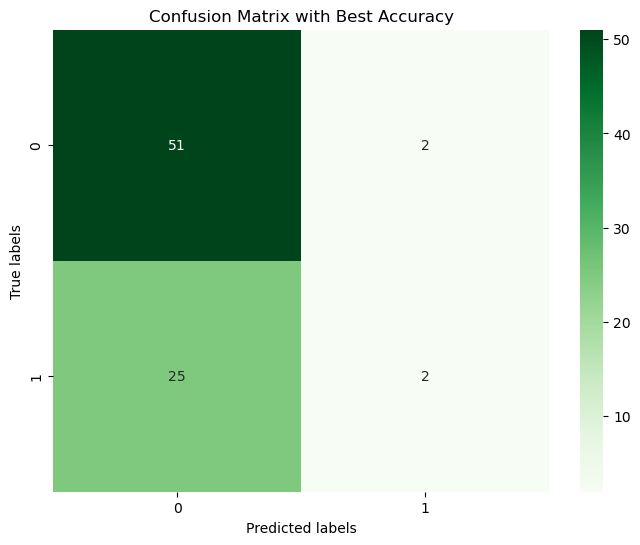

"\na. How the size of the training/testing data affects the performance of logistic regression:\n\nThe size of training/testing data plays a crucial role in the performance of logistic regression. \nHaving a larger training set can lead to a more generalized model as it has more data to learn from. \nOn the other hand, a smaller testing set might not give a true representation of the model's performance. \nHowever, if the training set is too large (and hence the testing set too small), we might overfit our \nmodel to the training data, making it perform poorly on unseen data.\n\nb. How a logistic regression model can be used in Business Analytics problems:\n\nLogistic regression is a powerful tool in business analytics due to its ability to handle classification \nproblems and predict probabilities. Some applications include:\n- Customer Churn: Predict if a customer will churn or not.\n- Credit Scoring: Predict if a borrower will default on a loan.\n- Marketing: Predict if a customer w

In [8]:
# b) Define the size of the training and testing data.
# Let's initially set the training data to 80% and testing data to 20%
train_size = 0.8
test_size = 0.2

X = data[['gre', 'gpa', 'rank']]
y = data['admit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)



Best accuracy of 0.71900826446281 achieved with training size of 0.7


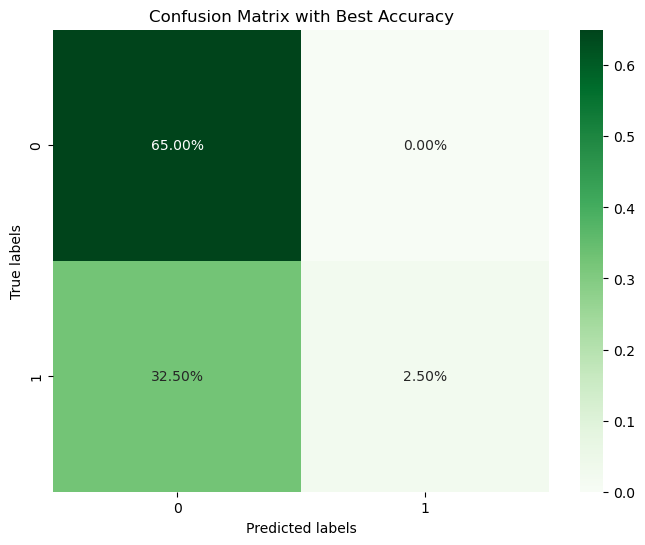

"\na. How the size of the training/testing data affects the performance of logistic regression:\n\nThe size of training/testing data plays a crucial role in the performance of logistic regression. \nHaving a larger training set can lead to a more generalized model as it has more data to learn from. \nOn the other hand, a smaller testing set might not give a true representation of the model's performance. \nHowever, if the training set is too large (and hence the testing set too small), we might overfit our \nmodel to the training data, making it perform poorly on unseen data.\n\nb. How a logistic regression model can be used in Business Analytics problems:\n\nLogistic regression is a powerful tool in business analytics due to its ability to handle classification \nproblems and predict probabilities. Some applications include:\n- Customer Churn: Predict if a customer will churn or not.\n- Credit Scoring: Predict if a borrower will default on a loan.\n- Marketing: Predict if a customer w

In [14]:
# c) Build the logistic regression model and get the confusion matrix for the model
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

cm = confusion_matrix(y_test, predictions)


In [19]:
# d) Adjust the size of the training/testing data a few times, saving the best accuracy and training size
best_accuracy = 0
best_train_size = 0
sizes = [0.6, 0.7, 0.8, 0.9]

for size in sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-size, random_state=42)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    cm = confusion_matrix(y_test, predictions)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_train_size = size
        best_cm = cm  # Update the best confusion matrix here


print(f"Best accuracy of {best_accuracy} achieved with training size of {best_train_size}")



Best accuracy of 0.71900826446281 achieved with training size of 0.7


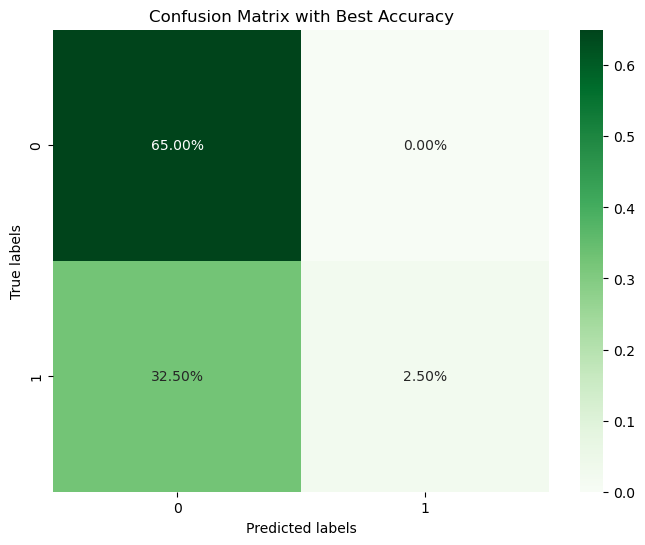

'\nDescription of the visualization:\n\nThe heatmap visualizes the confusion matrix. The values in the matrix represent:\n- Top-left: True Negatives (TN) - Correctly predicted non-admissions.\n- Top-right: False Positives (FP) - Incorrectly predicted admissions.\n- Bottom-left: False Negatives (FN) - Incorrectly predicted non-admissions.\n- Bottom-right: True Positives (TP) - Correctly predicted admissions.\n\nHigher numbers on the diagonal (from top-left to bottom-right) indicate correct predictions, \nwhile off-diagonal numbers indicate incorrect predictions.\n\n'

In [17]:
# e) Visualise your confusion matrix with the best accuracy.
plt.figure(figsize=(8, 6))

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in best_cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in best_cm.flatten()/np.sum(best_cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create a normalized confusion matrix for percentages
normalized_cm = best_cm / np.sum(best_cm)

sns.heatmap(normalized_cm, annot=labels, fmt='', cmap="Greens", cbar=False)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix with Best Accuracy')
plt.show()


"""
Description of the visualization:

The heatmap visualizes the confusion matrix. The values in the matrix represent:
- Top-left: True Negatives (TN) - Correctly predicted non-admissions.
- Top-right: False Positives (FP) - Incorrectly predicted admissions.
- Bottom-left: False Negatives (FN) - Incorrectly predicted non-admissions.
- Bottom-right: True Positives (TP) - Correctly predicted admissions.

Higher numbers on the diagonal (from top-left to bottom-right) indicate correct predictions, 
while off-diagonal numbers indicate incorrect predictions.

"""



In [12]:
# f) Share your thoughts

"""
a. How the size of the training/testing data affects the performance of logistic regression:

The size of training/testing data plays a crucial role in the performance of logistic regression. 
Having a larger training set can lead to a more generalized model as it has more data to learn from. 
On the other hand, a smaller testing set might not give a true representation of the model's performance. 
However, if the training set is too large (and hence the testing set too small), we might overfit our 
model to the training data, making it perform poorly on unseen data.

b. How a logistic regression model can be used in Business Analytics problems:

Logistic regression is a powerful tool in business analytics due to its ability to handle classification 
problems and predict probabilities. Some applications include:
- Customer Churn: Predict if a customer will churn or not.
- Credit Scoring: Predict if a borrower will default on a loan.
- Marketing: Predict if a customer will respond to a marketing campaign.
- Human Resources: Predict if a candidate will accept a job offer or not.

In each of these cases, logistic regression not only classifies but also provides a probability score 
which can be crucial for decision-making processes in business contexts.
"""

"\na. How the size of the training/testing data affects the performance of logistic regression:\n\nThe size of training/testing data plays a crucial role in the performance of logistic regression. \nHaving a larger training set can lead to a more generalized model as it has more data to learn from. \nOn the other hand, a smaller testing set might not give a true representation of the model's performance. \nHowever, if the training set is too large (and hence the testing set too small), we might overfit our \nmodel to the training data, making it perform poorly on unseen data.\n\nb. How a logistic regression model can be used in Business Analytics problems:\n\nLogistic regression is a powerful tool in business analytics due to its ability to handle classification \nproblems and predict probabilities. Some applications include:\n- Customer Churn: Predict if a customer will churn or not.\n- Credit Scoring: Predict if a borrower will default on a loan.\n- Marketing: Predict if a customer w